In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import BTC Data

In [2]:
! pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 6.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
data = pd.DataFrame
data = yf.download(tickers='BTC-USD',start="2019-01-01", end="2022-01-01", interval = '1d')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


In [4]:
train1 = data.iloc[:, 0:1]
train2 = data.iloc[:, 3:4]
train = train1.join([train2])
train.shape

(1097, 2)

In [5]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
ms.fit(train)
train = ms.transform(train)
train[:5]

array([[0.00538341, 0.00692016],
       [0.00698131, 0.00847686],
       [0.00825699, 0.00681452],
       [0.00671356, 0.00714142],
       [0.0070243 , 0.00694626]])

In [6]:
x_train = []
y_train = []
for i in range(14, len(train)):
  x_train.append(train[i-14:i])
  y_train.append(train[i])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((1083, 14, 2), (1083, 2))

# LSTM Model
this model predict BTC price by recent prices.

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [8]:
# Create model
model = Sequential()
# Add LSTM layers and Dropouts
# First layers
model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(14, 2)))
model.add(Dropout(0.2))
# Seconde layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
# Third Layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
# Fourth layer
model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=240, activation='relu'))
model.add(Dropout(0.4))

In [9]:
# Output layer
model.add(Dense(units=2))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 60)            15120     
                                                                 
 dropout (Dropout)           (None, 14, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 80)            45120     
                                                                 
 dropout_1 (Dropout)         (None, 14, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 80)            51520     
                                                                 
 dropout_2 (Dropout)         (None, 14, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 14, 120)           9

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(x_train, y_train, batch_size=1028, epochs=100)

Epoch 1/100
2/2 [==============================] - 9s 132ms/step - loss: 0.1752
Epoch 2/100
2/2 [==============================] - 0s 128ms/step - loss: 0.1644
Epoch 3/100
2/2 [==============================] - 0s 131ms/step - loss: 0.1474
Epoch 4/100
2/2 [==============================] - 0s 135ms/step - loss: 0.1177
Epoch 5/100
2/2 [==============================] - 0s 137ms/step - loss: 0.0800
Epoch 6/100
2/2 [==============================] - 0s 151ms/step - loss: 0.0911
Epoch 7/100
2/2 [==============================] - 0s 157ms/step - loss: 0.0687
Epoch 8/100
2/2 [==============================] - 0s 153ms/step - loss: 0.0446
Epoch 9/100
2/2 [==============================] - 0s 163ms/step - loss: 0.0272
Epoch 10/100
2/2 [==============================] - 0s 144ms/step - loss: 0.0176
Epoch 11/100
2/2 [==============================] - 0s 137ms/step - loss: 0.0140
Epoch 12/100
2/2 [==============================] - 0s 135ms/step - loss: 0.0243
Epoch 13/100
2/2 [===================

In [13]:
test = pd.DataFrame
test = yf.download(tickers='BTC-USD',start="2022-01-01", end="2022-08-14", interval = '1d')
test.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [14]:
train1 = test.iloc[:, 0:1]
train4 = test.iloc[:, 3:4]
test = train1.join([train4])
test.shape

(226, 2)

In [15]:
# Scale test data
test = ms.transform(test)
test[:5]

array([[0.6689239 , 0.69018491],
       [0.69026785, 0.68486142],
       [0.68500844, 0.67103661],
       [0.67121711, 0.66230097],
       [0.66249526, 0.62601195]])

In [16]:
x_test = []
y_test = []
for i in range(14, len(test)):
  x_test.append(test[i-14:i])
  y_test.append(test[i])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((212, 14, 2), (212, 2))

In [17]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 2s 30ms/step - loss: 0.0034


0.0034286880400031805

In [18]:
prediction = model.predict(x_test)

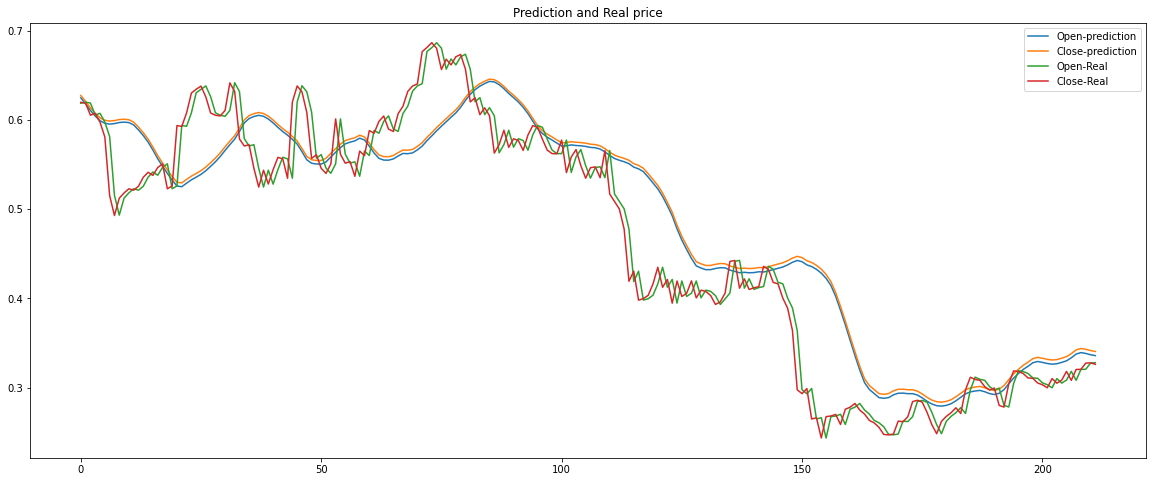

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8), dpi=72)
plt.title('Prediction and Real price')
plt.plot(prediction[:, 0], label='Open-prediction')
plt.plot(prediction[:, 1], label='Close-prediction')
plt.plot(y_test[:,0],label='Open-Real')
plt.plot(y_test[:,1], label='Close-Real')
plt.legend()

# Data import and Preproccesing

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
data = pd.read_csv('/content/drive/MyDrive/data-p.csv')

In [38]:
data.head()

,Unnamed: 0,date,text,cleantext,comp,label
0,0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,blue ridge bank share halted by nyse after bit...,0.2960,1
1,1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",today that s this thursday we will do a take 2...,0.6808,1
2,2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",guy evening i have read this article about btc...,0.5719,1
3,3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,btc a big chance in a billion price 4872644 0 ...,0.2500,1
4,4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,this network is secured by 9 508 node a of tod...,-0.2023,-1


In [39]:
# Unnatural data with invalid date
data = data.drop(2552536)
data.shape

(3911086, 6)

In [40]:
# clean and duplicate data
dt = pd.DataFrame()
dt['date'], dt['text'], dt['comp'], dt['label'] = data['date'], data['text'], data['comp'], data['label']
dt.set_index('date')
dt.head()

,date,text,comp,label
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,0.2960,1
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",0.6808,1
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",0.5719,1
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,0.2500,1
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,-0.2023,-1


In [41]:
#clean data(date column)
date = dt['date']
date = date[~date.str.contains("BTC")]
date = date[~date.str.contains("ETH")]
date = date[~date.str.contains("Bitcoin")]
date = date[~date.str.contains("bitcoin")]

In [42]:
# convert date to date format in DataFrame
# drop time from date column
date = pd.to_datetime(date).dt.date

In [43]:
dt['date'] = date
dt.head()

,date,text,comp,label
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,0.2960,1
1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...",0.6808,1
2,2021-02-10,"Guys evening, I have read this article about B...",0.5719,1
3,2021-02-10,$BTC A big chance in a billion! Price: \487264...,0.2500,1
4,2021-02-10,This network is secured by 9 508 nodes as of t...,-0.2023,-1


In [45]:
# Group every day tweet
sum = dt.groupby(['date']).sum()
sum.shape

(186, 2)

So we have only 186 days data from Twitter

In [46]:
sum.to_csv('/content/drive/MyDrive/Daily-Tweet_score.csv')

Text(0, 0.5, 'Count')

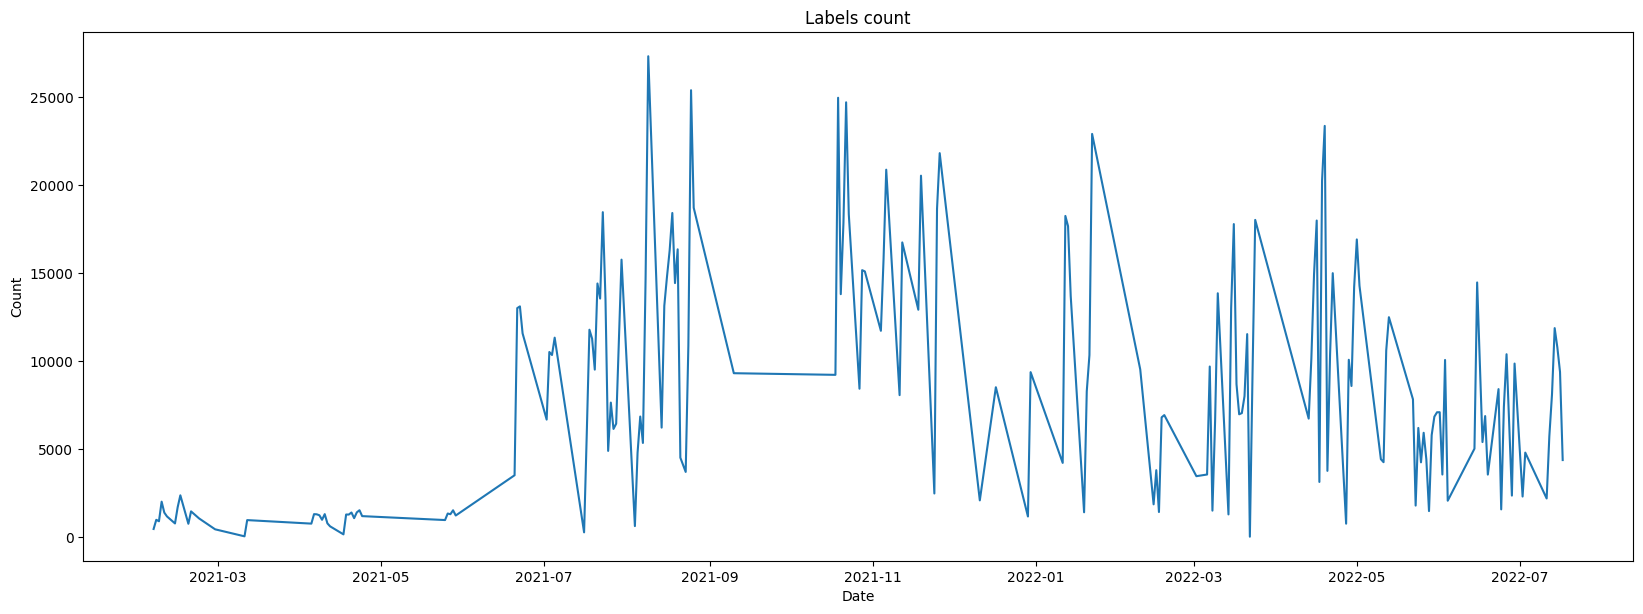

In [53]:
plt.figure(figsize=[20,7], dpi=100)
plt.plot(sum['label'])
plt.title('Labels count')
plt.xlabel('Date')
plt.ylabel('Count')

In [56]:
from sklearn.preprocessing import MinMaxScaler
# Scale Count of labels between -1 to 1
norm = MinMaxScaler(feature_range=(-1,1))
daily = pd.DataFrame(sum)
norm.fit(daily[['comp', 'label']])
daily[['comp', 'label']] = norm.transform(daily[['comp', 'label']])
daily.index = pd.to_datetime(daily.index)

Text(0, 0.5, 'Count')

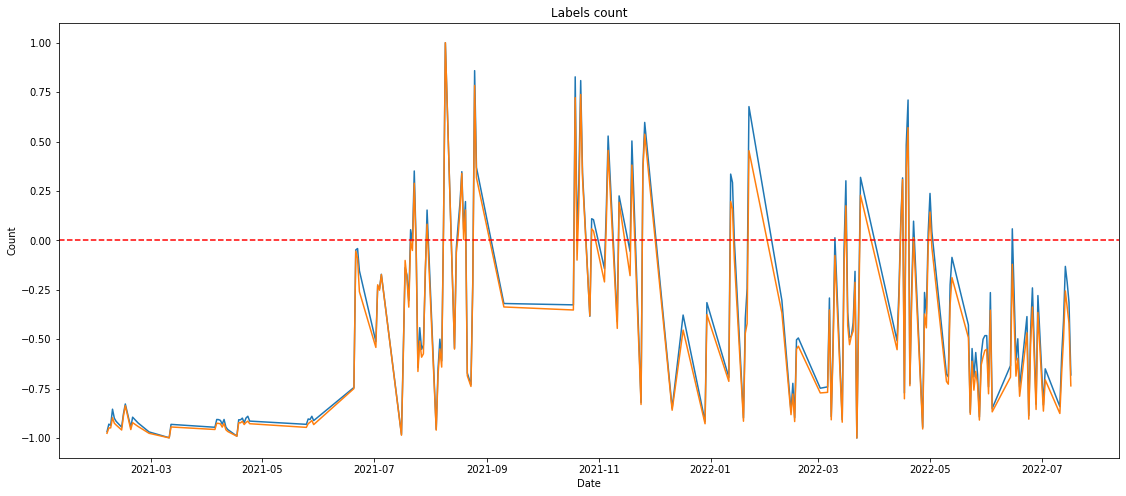

In [57]:
plt.figure(figsize=(19,8))
plt.plot(daily['label'])
plt.plot(daily['comp'])
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Labels count')
plt.xlabel('Date')
plt.ylabel('Count')

In [58]:
# import BTC data that blongs to Tweets date's
dt = pd.DataFrame
dt = yf.download(tickers='BTC-USD',start="2021-02-05", end="2022-07-17", interval = '1d')
dt.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886


In [59]:
merg = pd.DataFrame(dt.index, columns=['Date','comp', 'label']).set_index('Date')
for i in dt.index:
  for x in daily.index:
    if i == x:
      merg.loc[merg.index == i] = daily.loc[daily.index == x]

In [60]:
dt = pd.DataFrame(dt)
dt = norm.fit_transform(dt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Price and Emotions')

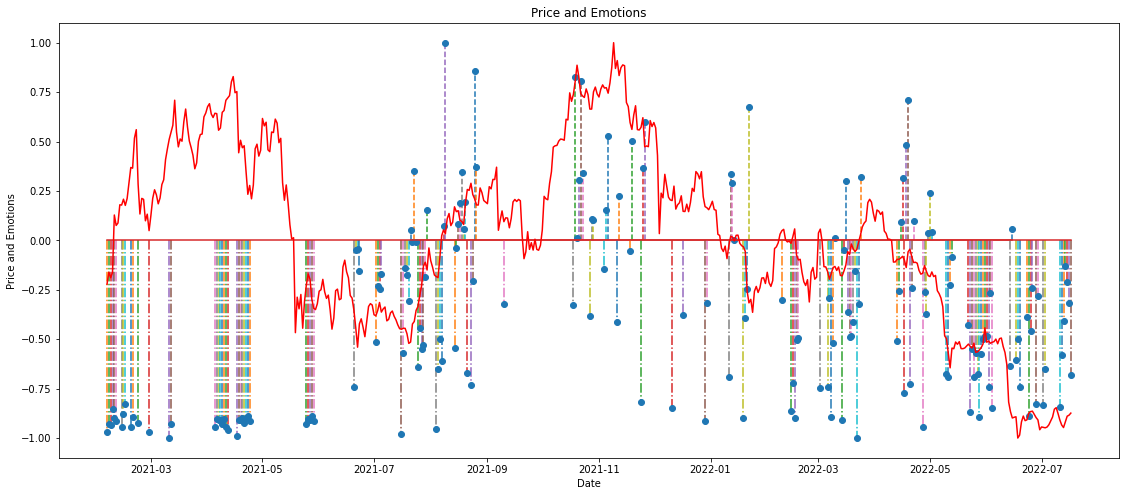

In [61]:
plt.figure(figsize=(19, 8))
plt.stem(merg[merg['label'].to_numpy() > 0].index, merg['label'][merg['label'].to_numpy() > 0], linefmt='--')
plt.stem(merg[merg['label'].to_numpy() < 0].index, merg['label'][merg['label'].to_numpy() < 0], linefmt='-.' )
plt.plot(merg.index,dt[:, 2:3], c='r')
plt.title('Price and Emotions')
plt.xlabel('Date')
plt.ylabel('Price and Emotions')

In [62]:
data_merg = merg
data_merg['close'] = dt[:, 2:3]
data_merg.drop(columns='comp', inplace=True)

In [64]:
data_merg['label'] = data_merg['label'].fillna(0)

In [65]:
# Select Train and Test data
x_train = data_merg[:428]
y_train = data_merg['close'][:428]
x_test = data_merg[428:528]
y_test = data_merg['close'][428:528]
x_train.shape, x_test.shape

((428, 2), (100, 2))

In [66]:
x = []
y = []
for i in range(14, len(x_train)):
  x.append(x_train[i-14:i])
  y.append(y_train[i])
x, y = np.array(x), np.array(y).reshape(414,1)
x.shape, y.shape

((414, 14, 2), (414, 1))

# LSTM Model

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [68]:
# Create model
model = Sequential()
# Add LSTM layers and Dropouts
# First layers
model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(14, 2)))
model.add(Dropout(0.2))
# Seconde layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
# Third Layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
# Fourth layer
model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=240, activation='relu'))
model.add(Dropout(0.4))

In [69]:
# Output layer
model.add(Dense(units=1))

In [70]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [71]:
model.fit(x, y, batch_size=1028, epochs=100)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.1551
Epoch 2/100
1/1 [==============================] - 0s 150ms/step - loss: 0.1513
Epoch 3/100
1/1 [==============================] - 0s 167ms/step - loss: 0.1471
Epoch 4/100
1/1 [==============================] - 0s 149ms/step - loss: 0.1423
Epoch 5/100
1/1 [==============================] - 0s 141ms/step - loss: 0.1358
Epoch 6/100
1/1 [==============================] - 0s 212ms/step - loss: 0.1296
Epoch 7/100
1/1 [==============================] - 0s 141ms/step - loss: 0.1256
Epoch 8/100
1/1 [==============================] - 0s 147ms/step - loss: 0.1252
Epoch 9/100
1/1 [==============================] - 0s 143ms/step - loss: 0.1250
Epoch 10/100
1/1 [==============================] - 0s 162ms/step - loss: 0.1198
Epoch 11/100
1/1 [==============================] - 0s 145ms/step - loss: 0.1136
Epoch 12/100
1/1 [==============================] - 0s 138ms/step - loss: 0.1052
Epoch 13/100
1/1 [======================

In [72]:
x1 = []
y1 = []
for i in range(14, len(x_test)):
  x1.append(x_test[i-14:i])
  y1.append(y_test[i])
x1, y1 = np.array(x1), np.array(y1).reshape(86,1)
x1.shape, y1.shape

((86, 14, 2), (86, 1))

In [73]:
model.evaluate(x1, y1)

3/3 [==============================] - 1s 17ms/step - loss: 0.0296


0.029560701921582222

In [74]:
prediction = model.predict(x1)

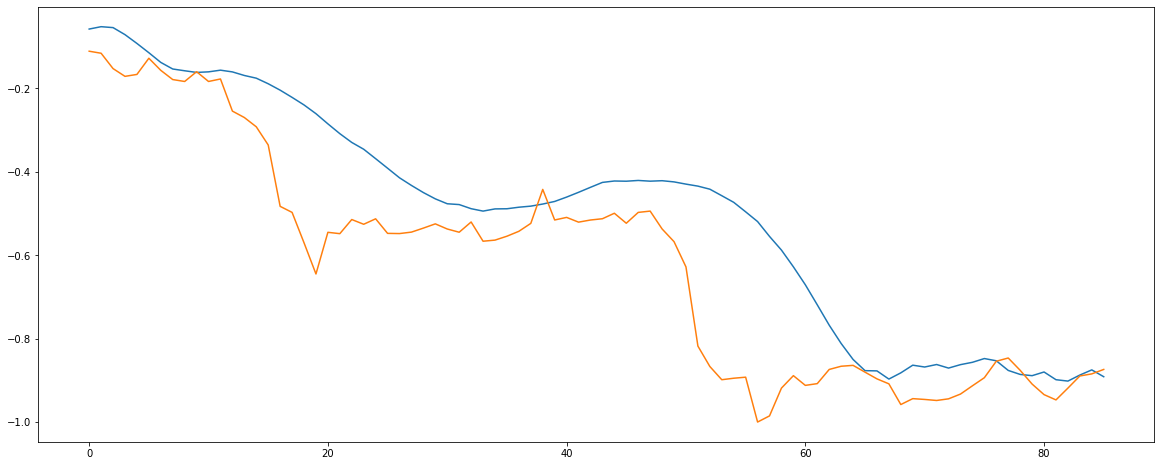

In [78]:
plt.figure(figsize=(20,8))
plt.plot(prediction)
plt.plot(y1)

In [76]:
pred = []
for i in range(len(prediction)- 1):
  d = prediction[i+1] - prediction[i]
  if d > 0:
    d = 1
  if d < 0:
    d = -1
  pred.append(d)

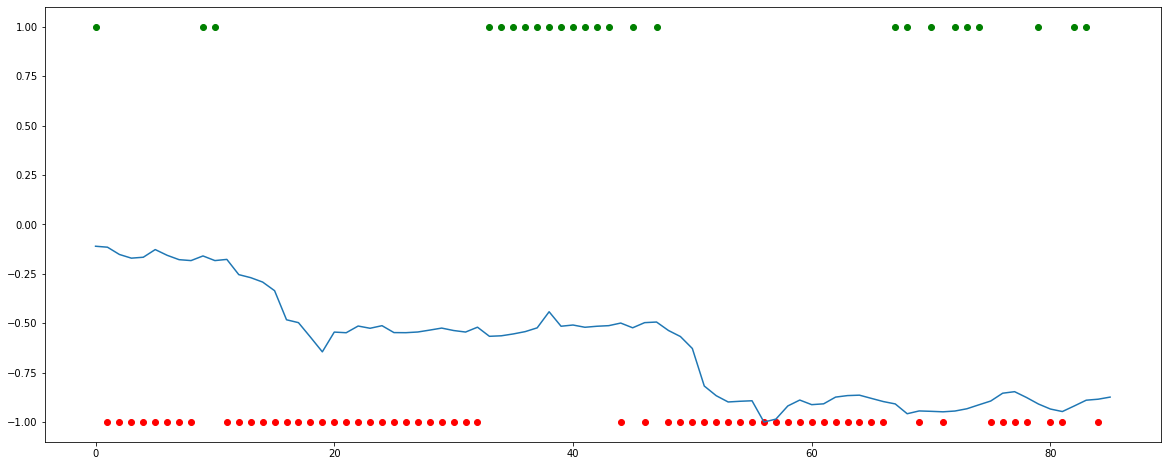

In [79]:
plt.figure(figsize=(20,8))
for i in range(85):
  if pred[i] > 0 :
    plt.scatter(i, pred[i], c='g')
  if pred[i] < 0 :
    plt.scatter(i, pred[i], c='r')
plt.plot(y1)